# 고혈압 환자의 합병증 위험 예측 및 예방 모델 분석
1. 데이터 전처리
2. 데이터 시각화 분석
3. 특성 데이터 전처리
4. 머신러닝(모델 분석)

In [1]:
import pandas as pd

df = pd.read_csv('건강검진환자데이터.csv',encoding = 'utf-8-sig')
df

,성별,연령,체중,수축기혈압,이완기혈압,공복혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,흡연상태,혈색소,BMI
0,2,65,55,130.0,82.0,98.0,NaN,NaN,NaN,NaN,1.0,13.4,21.48
1,2,50,55,130.0,80.0,98.0,NaN,NaN,NaN,NaN,1.0,10.8,21.48
2,1,45,100,130.0,90.0,103.0,NaN,NaN,NaN,NaN,1.0,14.7,30.86
3,2,55,60,149.0,90.0,84.0,NaN,NaN,NaN,NaN,1.0,13.6,24.97
4,2,50,50,129.0,80.0,104.0,NaN,NaN,NaN,NaN,1.0,11.8,20.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,1,40,65,107.0,61.0,83.0,NaN,NaN,NaN,NaN,1.0,13.6,22.49
3999996,1,50,80,139.0,86.0,118.0,246.0,303.0,59.0,126.0,2.0,15.3,29.38
3999997,2,55,65,146.0,83.0,156.0,NaN,NaN,NaN,NaN,1.0,14.7,27.06
3999998,2,35,55,122.0,71.0,105.0,NaN,NaN,NaN,NaN,1.0,13.5,21.48


## 1. 데이터 전처리

### 1.1 건강검진정보_원본에서 전처리

1. 불필요한 컬럼 제거
2. 결측치 처리
3. 이상치 제거

In [2]:
df.isnull().sum()

성별                0
연령                0
체중                0
수축기혈압         22236
이완기혈압         22238
공복혈당          22484
총콜레스테롤      2632192
트리글리세라이드    2632191
HDL콜레스테롤    2632195
LDL콜레스테롤    2658417
흡연상태            787
혈색소           22507
BMI               0
dtype: int64

> 혈압, 혈당, 흡연상태, 혈색소 결측치 적음\
> 콜레스테롤, 트리글리세라이드가 결측치 많음

1.1.1 변수
- 필요한 변수들 추가
- 불필요한 변수들 제거

1.1.2 결측치 처리
- 데이터 400만 개로 결측치가 적은 변수들 dropna()로 날림
- 결측치가 많은 변수들 중앙값으로 대체

In [3]:
df['고혈압여부'] = ((df['수축기혈압'] >= 140) | (df['이완기혈압'] >= 90)).astype(int)
df['당뇨여부'] = (df['공복혈당'] >= 126).astype(int)
df['고지혈증여부'] = ((df['총콜레스테롤'] >=240)| (df['LDL콜레스테롤'] >= 90) | (df['HDL콜레스테롤'] < 40)|(df["트리글리세라이드"] >= 200)).astype(int)
df['합병증여부'] = ((df['고혈압여부'] == 1) & ((df['고지혈증여부'] == 1) | (df['당뇨여부'] == 1))).astype(int)

In [4]:
df['총콜레스테롤'] = df['총콜레스테롤'].fillna(df['총콜레스테롤'].median())
df['트리글리세라이드'] = df['트리글리세라이드'].fillna(df['트리글리세라이드'].median())
df['HDL콜레스테롤'] = df['HDL콜레스테롤'].fillna(df['HDL콜레스테롤'].median())
df['LDL콜레스테롤'] = df['LDL콜레스테롤'].fillna(df['LDL콜레스테롤'].median())

In [5]:
df = df.dropna(subset=['수축기혈압','이완기혈압','공복혈당','흡연상태','혈색소'])
df

,성별,연령,체중,수축기혈압,이완기혈압,공복혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,흡연상태,혈색소,BMI,고혈압여부,당뇨여부,고지혈증여부,합병증여부
0,2,65,55,130.0,82.0,98.0,196.0,107.0,55.0,114.0,1.0,13.4,21.48,0,0,0,0
1,2,50,55,130.0,80.0,98.0,196.0,107.0,55.0,114.0,1.0,10.8,21.48,0,0,0,0
2,1,45,100,130.0,90.0,103.0,196.0,107.0,55.0,114.0,1.0,14.7,30.86,1,0,0,0
3,2,55,60,149.0,90.0,84.0,196.0,107.0,55.0,114.0,1.0,13.6,24.97,1,0,0,0
4,2,50,50,129.0,80.0,104.0,196.0,107.0,55.0,114.0,1.0,11.8,20.81,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,1,40,65,107.0,61.0,83.0,196.0,107.0,55.0,114.0,1.0,13.6,22.49,0,0,0,0
3999996,1,50,80,139.0,86.0,118.0,246.0,303.0,59.0,126.0,2.0,15.3,29.38,0,0,1,0
3999997,2,55,65,146.0,83.0,156.0,196.0,107.0,55.0,114.0,1.0,14.7,27.06,1,1,0,1
3999998,2,35,55,122.0,71.0,105.0,196.0,107.0,55.0,114.0,1.0,13.5,21.48,0,0,0,0


1.1.3 이상치 제거
- describe()로 확인했을 때 이상치 존재
- IQR을 높여 이상치 제거

In [134]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,성별,연령,체중,수축기혈압,이완기혈압,공복혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,흡연상태,혈색소,BMI,고혈압여부,당뇨여부,고지혈증여부,합병증여부
count,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00
mean,1.48,52.54,64.26,123.02,75.74,101.12,196.67,115.63,55.60,114.55,1.55,14.24,24.15,0.14,0.08,0.93,0.13
std,0.50,15.07,13.67,14.64,10.19,23.52,25.14,61.22,9.43,22.47,0.80,1.55,3.89,0.35,0.27,0.25,0.34
min,1.00,25.00,30.00,54.00,10.00,1.00,30.00,1.00,1.00,1.00,1.00,0.10,9.80,0.00,0.00,0.00,0.00
25%,1.00,40.00,55.00,113.00,69.00,89.00,196.00,107.00,55.00,114.00,1.00,13.20,21.48,0.00,0.00,1.00,0.00
50%,1.00,55.00,65.00,122.00,76.00,96.00,196.00,107.00,55.00,114.00,1.00,14.20,23.88,0.00,0.00,1.00,0.00
75%,2.00,65.00,75.00,132.00,82.00,106.00,196.00,107.00,55.00,114.00,2.00,15.40,26.16,0.00,0.00,1.00,0.00
max,2.00,90.00,135.00,269.00,202.00,961.00,2635.00,8012.00,922.00,2536.00,3.00,25.00,63.78,1.00,1.00,1.00,1.00


In [135]:
numeric_cols = df.select_dtypes(include=['number']).columns

outlier_s = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_s[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_s, orient = 'index', columns = ['이상치 개수'])
print(outlier_df)

           이상치 개수
성별              0
연령              0
체중              0
수축기혈압        2828
이완기혈압        2086
공복혈당       102663
총콜레스테롤    1354130
트리글리세라이드  1358280
HDL콜레스테롤  1329081
LDL콜레스테롤  1326979
흡연상태            0
혈색소          1135
BMI          7181
고혈압여부      560058
당뇨여부       318085
고지혈증여부     264284
합병증여부      523035


> 이상치 제거 시, 타겟 클래스인 고혈압 여부가 과도하게 줄어들어 분석이 어려워짐
> 따라서, 이상치는 제거하지 않고 스케일링을 통해 변수 간 균형을 맞추는 방향으로 전처리
> 추후 이상치 처리와 타겟 유지 간 균형점을 찾는 방향으로 추가 개선 필요

## 2. 데이터 시각화 분석

### 2.1 변수 관계 시각화
- 피어슨 상관관계를 히트맵으로 시각화하여 높은 상관관계 확인 후 변수 제거
- 정상인 내 연령대 및 성별에 따른 혈압 분포 시각화

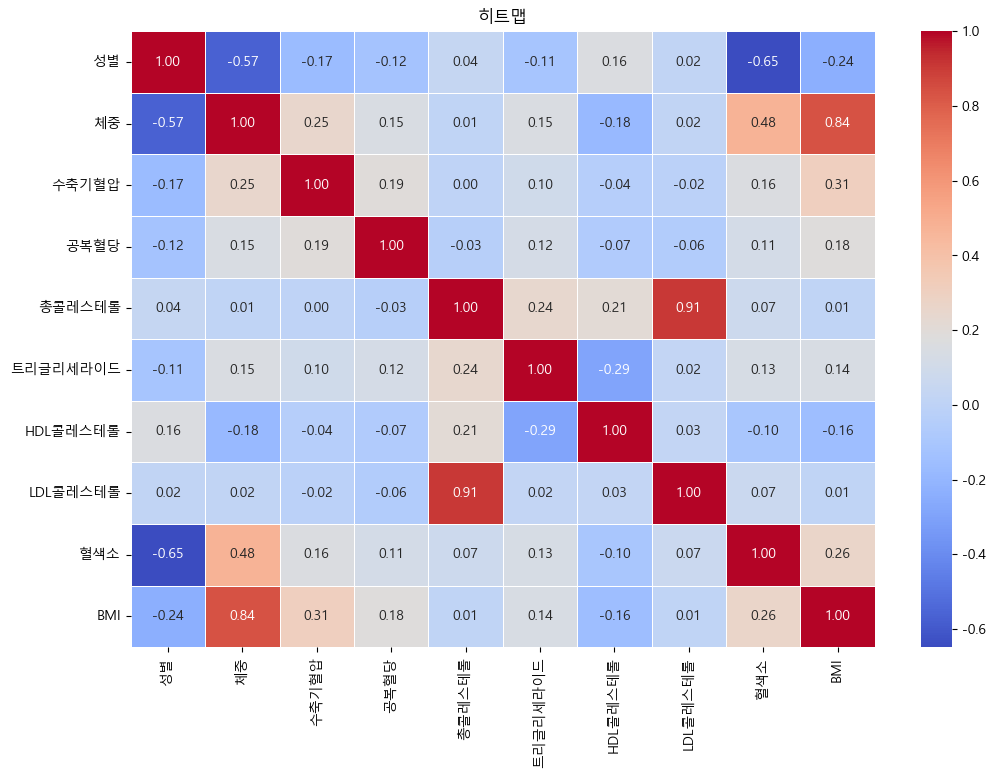

In [137]:
df_s = df.drop(['연령','이완기혈압','고혈압여부','흡연상태','당뇨여부','고지혈증여부','합병증여부'],axis=1)

df_s=df_s.corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_s, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('히트맵')
plt.show()

> 수축기혈압, 이완기 혈압 상관관계 계수가 매우 높아 2개 변수 중 하나만 사용

2.1.2 정상인 내 혈압 비교
- 평균적인 위치 : 대부분 정상 혈압에 위치
- 비정상적인 값 : 고혈압 혹은 저혈압 환자 가능성
- 분포 모양 : 완전한 대칭이 아니며 오른쪽 방향으로 치우쳐 일부 고혈압 존재

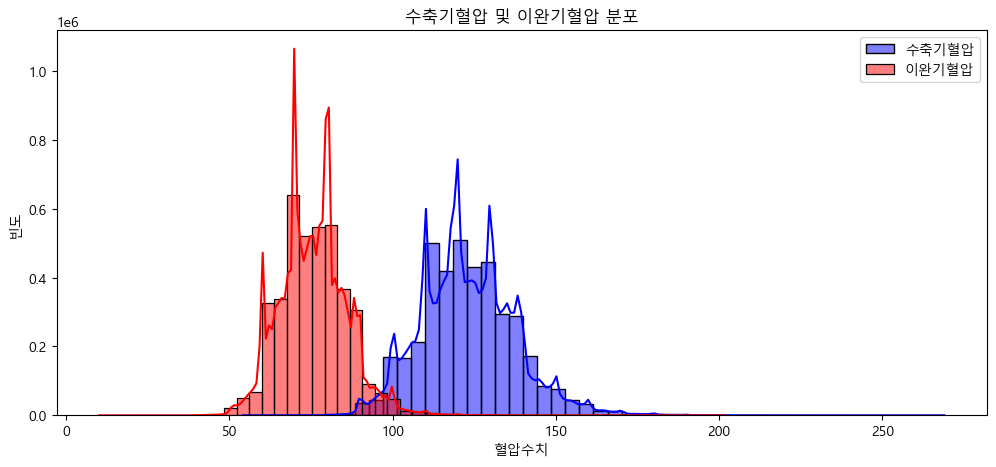

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,5))

sns.histplot(df['수축기혈압'], bins = 50, kde = True, color = 'blue', label = '수축기혈압')
sns.histplot(df['이완기혈압'], bins = 50, kde = True, color = 'red', label = '이완기혈압')

plt.legend()
plt.title('수축기혈압 및 이완기혈압 분포')
plt.xlabel('혈압수치')
plt.ylabel('빈도')

plt.show()

2.1.2 연령대별 평균 혈압
- 연령이 증가할수록 수축기 혈압도 같이 증가
- 고령층에서는 혈관 탄력성이 떨어지면서 수축기혈압이 높아짐

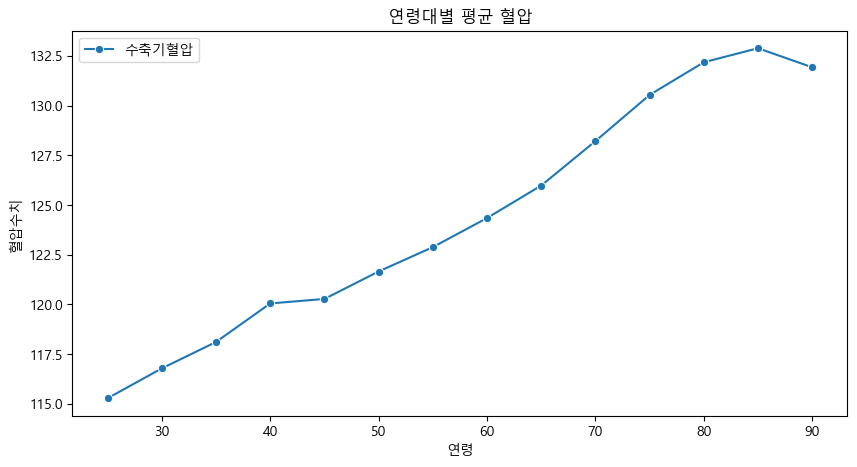

In [71]:
age_gp = df.groupby('연령')['수축기혈압'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=age_gp['연령'], y=age_gp['수축기혈압'], marker = 'o', label = '수축기혈압')

plt.title('연령대별 평균 혈압')
plt.xlabel('연령')
plt.ylabel('혈압수치')
plt.legend()
plt.show()

2.1.2 성별에 따른 평균 혈압 분석

- 두 혈압 모두 남성이 여성보다 높게 나타남
   - 남성의 심혈관 질환 위험이 더 높을 가능성
   - 일반적으로 남성이 여성보다 고혈압 위험이 높음

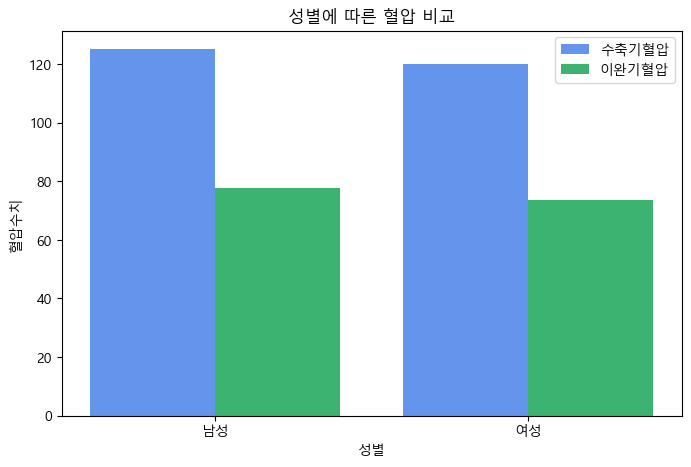

In [72]:
import numpy as np

gender_gp = df.groupby('성별')[['수축기혈압','이완기혈압']].mean().reset_index()
gender_gp['성별'] = gender_gp['성별'].replace({1:'남성', 2:'여성'})

x=np.arange(len(gender_gp['성별']))
width=0.4

plt.figure(figsize=(8, 5))
plt.bar(x-width/2, gender_gp['수축기혈압'], width=width, label='수축기혈압', color = 'cornflowerblue')
plt.bar(x+width/2, gender_gp['이완기혈압'], width=width, label='이완기혈압', color = 'mediumseagreen')

plt.xticks(x,gender_gp['성별'])

plt.title('성별에 따른 혈압 비교')
plt.xlabel('성별')
plt.ylabel('혈압수치')
plt.legend()
plt.show()

### 2.2 환자들 비교 분석 및 시각화
1. 정상과 고혈압 환자 비교 분석
2. 정상과 당뇨 환자 비교 분석

In [73]:
hypertension = df[(df['수축기혈압'] >= 140) | (df['이완기혈압'] >= 90)]


total_count = len(df)
hypten_count = len(hypertension)
hypten_ratio = (hypten_count / total_count) * 100

print(f'전체 데이터 개수 : {total_count}명')
print(f'고혈압 환자 수 : {hypten_count}명')
print(f'고혈압 비율 : {hypten_ratio : .2f}%')

전체 데이터 개수 : 1775485명
고혈압 환자 수 : 239149명
고혈압 비율 :  13.47%


> 데이터 기준 고혈압 환자들 비율 약 14%

2.2.1 정상 VS 고혈압 주요 변수 비교 시각화
- 고혈압 여부 기준으로 정상군과 고혈압군으로 분리
- 수치형 변수 중 비교 대상이 되는 컬럼만 추출하여 평균값 계산
- 정상군과 고혈압군의 평균을 bar 차트로 시각화하여 변수 간 차이 확인

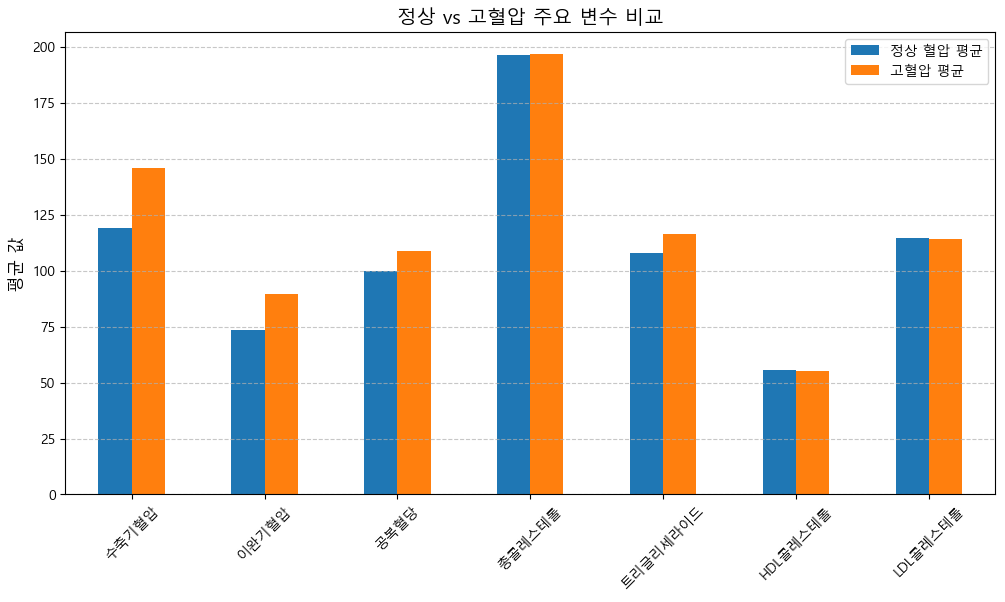

In [77]:
normal_gp = df[df['고혈압여부'] == 0]
hypten_gp = df[df['고혈압여부'] == 1]

compare_cols = df.select_dtypes(include=['number']).columns.drop(['성별','연령','체중','흡연상태','혈색소','BMI','고혈압여부','당뇨여부','고지혈증여부','합병증여부'])

df_data = {
    "정상 혈압 평균" : normal_gp[compare_cols].mean().astype(float),
    "고혈압 평균" : hypten_gp[compare_cols].mean().astype(float)
}

data = pd.DataFrame(df_data)

data.plot(kind='bar', figsize=(12,6))

plt.title("정상 vs 고혈압 주요 변수 비교", fontsize=14)
plt.ylabel("평균 값", fontsize=12)
plt.xticks(rotation=45)
plt.legend(["정상 혈압 평균", "고혈압 평균"], loc = 'upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

2.2.2. 정상 vs 당뇨 수축기 혈압 분포 시각화
- 당뇨 여부를 기준으로 정상과 당뇨로 나누어 수축기 혈압 분포 확인
- 각 그룹에 대해 histplot과 kdeplot(밀도추정)을 함께 시각화하여 분포 형태 비교
- x축은 60~200mmHg 구간을 10단위로 설정
- y축은 밀도 기준으로 정규화하여 표현

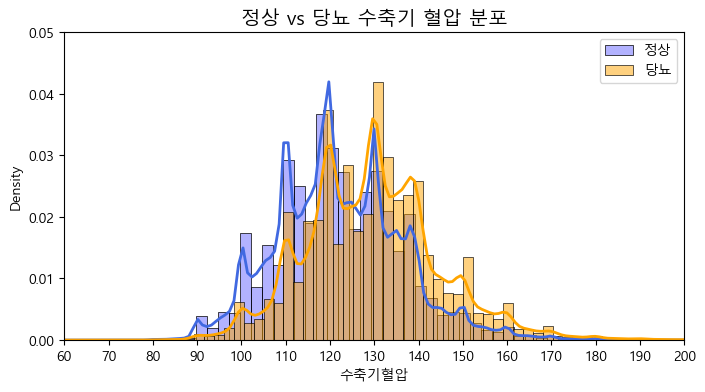

In [121]:
plt.figure(figsize=(8,4))

sns.histplot(data=df[df['당뇨여부'] == 0], x = '수축기혈압', label='정상', color = 'blue', bins=80, stat='density', alpha=0.3)
sns.kdeplot(data=df[df['당뇨여부'] == 0], x = '수축기혈압', color = 'royalblue', linewidth=2)

sns.histplot(data=df[df['당뇨여부'] == 1], x = '수축기혈압', label='당뇨', color = 'orange', bins=80, stat='density', alpha=0.5)
sns.kdeplot(data=df[df['당뇨여부'] == 1], x = '수축기혈압', color = 'orange', linewidth=2)

plt.xticks(ticks=range(60,201,10))
plt.xlim(60,200)
plt.ylim(0,0.05)

plt.title('정상 vs 당뇨 수축기 혈압 분포', fontsize=14)
plt.xlabel('수축기혈압')
plt.ylabel('Density')
plt.legend()

plt.show()

**합병증 여부 기준 설명**
> 합병증 여부는 만성 질환을 기준으로 정의\
> 고혈압, 당뇨, 고지혈증을 모두 가지고 있는 경우, 합병증 보유자로 분류

2.3.1 합병증 발생률 시각화
- 연령을 기준으로 그룹화하여 연령대별 합병증 발생 비율 계산
- 합병증 여부의 평균값에 100을 곱해 백분율로 변환
- 연령대별 합병증 발생률을 선그래프로 시각화하여 추세 확인

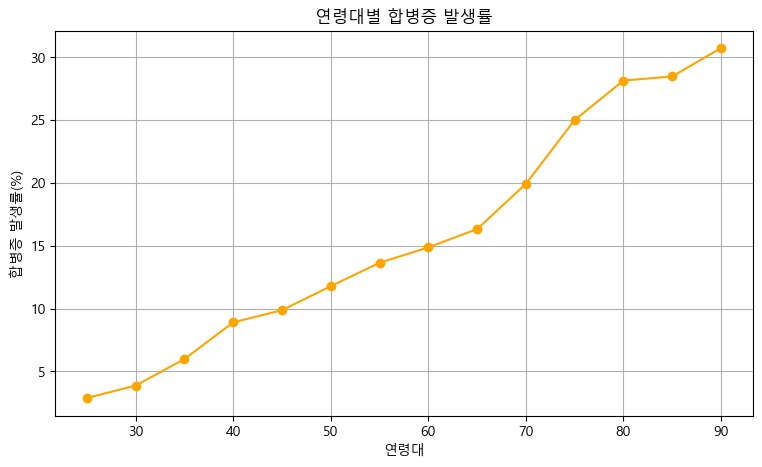

In [84]:
plt.figure(figsize=(9,5))
df.groupby('연령')['합병증여부'].mean().mul(100).plot(kind='line', marker='o', color='orange',linestyle='-')

plt.title('연령대별 합병증 발생률')
plt.xlabel('연령대')
plt.ylabel('합병증 발생률(%)')

plt.grid(True)
plt.show()

In [92]:
df['흡연상태'].unique()

array([1., 3., 2.])

2.3.2 흡연 및 성별에 따른 합병증 발생률 시각화
- 흡연상태 컬럼을 범주형 값(1: '비흡연', 2: '금연', 3: '흡연')으로 변환
- 흡연 상태와 성별을 기준으로 그룹화하여 합병증 발생률(%) 계산
- 흡연 여부와 성별에 따른 합병증 발생률을 막대 그래프로 시각화

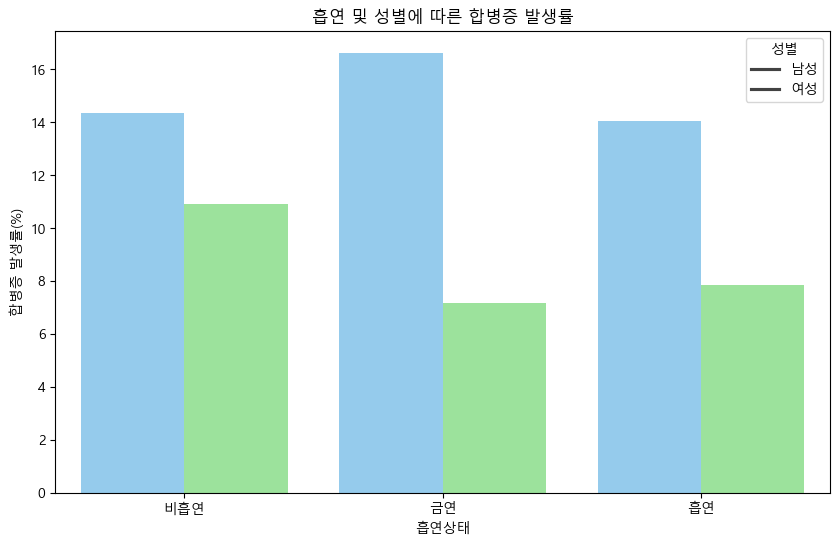

In [123]:
df['흡연상태'] = df['흡연상태'].replace({1: '비흡연', 2: '금연', 3: '흡연'})

smoke = df.groupby(['흡연상태','성별'])['합병증여부'].mean()*100
smoke = smoke.sort_index().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='흡연상태', y='합병증여부',hue='성별',data=smoke, palette=['#87CEFA','#90EE90'], order=['비흡연', '금연', '흡연'])

plt.ylabel('합병증 발생률(%)')
plt.title('흡연 및 성별에 따른 합병증 발생률')

plt.legend(title='성별', labels=['남성','여성'])
plt.show()

> - 전체적으로 남성이 여성보다 합병증 발생률이 높게 나타남\
> - 남성의 경우 금연자에서 합병증 발생률이 가장 높음\
> - 금연을 했다고 하여 합병증 발생률이 무조건 낮아지지 않음\
> - 과거 흡연 이력 등 영향 가능성 존재

2.3.3 BMI 범위에 따른 합병증 발생률 시각화
- BMI 값을 기준으로 저체중, 정상, 과체중, 비만으로 범주화
- 각 BMI 범주별로 합병증 발생률 계산
- 범주별 합병증 발생률 막대그래프로 시각화하여 BMI와 합병증 간 관계 확인

In [101]:
bmi_cate = [
    (df['BMI'] < 18.5),
    (df['BMI'].between(18.5, 24.9)),
    (df['BMI'].between(25, 29.9)),
    (df['BMI'] >= 30)
]

bmi_labels = ['저체중', '정상','과체중','비만']
df['bmi_cate'] = np.select(bmi_cate, bmi_labels)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13308\3996594103.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bmi_data.index, y=bmi_data.values, palette='viridis', order=bmi_order)


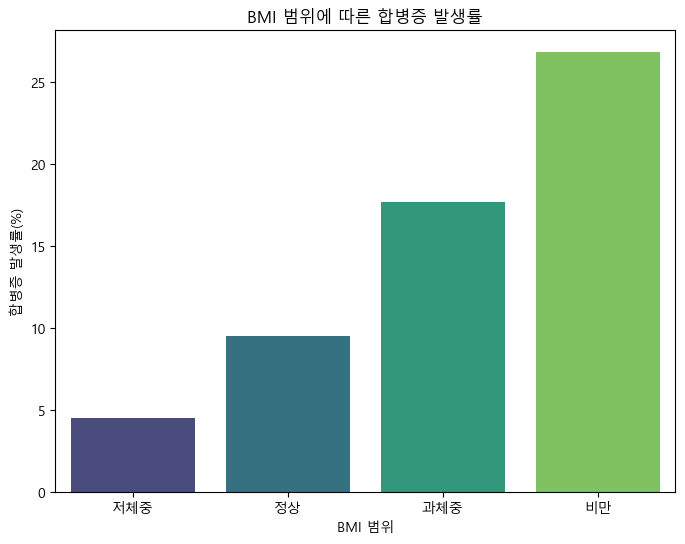

In [104]:
bmi_order = ['저체중', '정상','과체중','비만']
bmi_data = df.groupby('bmi_cate')['합병증여부'].mean() * 100

plt.figure(figsize=(8,6))
sns.barplot(x=bmi_data.index, y=bmi_data.values, palette='viridis', order=bmi_order)
plt.xlabel('BMI 범위')
plt.ylabel('합병증 발생률(%)')
plt.title('BMI 범위에 따른 합병증 발생률')
plt.show()

> - BMI가 증가할수록 합병증 발생률 함꼐 상승\
> - 과제충은 정상 체중 대비 합병증 발생률 약 1.5배\
> - 비만 그룹은 전체 BMI 그룹 중 가장 높은 수치를 보이며 타 그룹에 비해 25% 이상으로 나타남


2.3.4 BMI와 수축기 혈압 관계 시각화
- BMI와 수축기 혈압 간 관계 산점도로 시각화
- 합병증 여부에 따라 색상을 구분하여 분포 비교
- 전체 수축기 혈압의 평균값을 기준선으로 추가하여 기준 제시

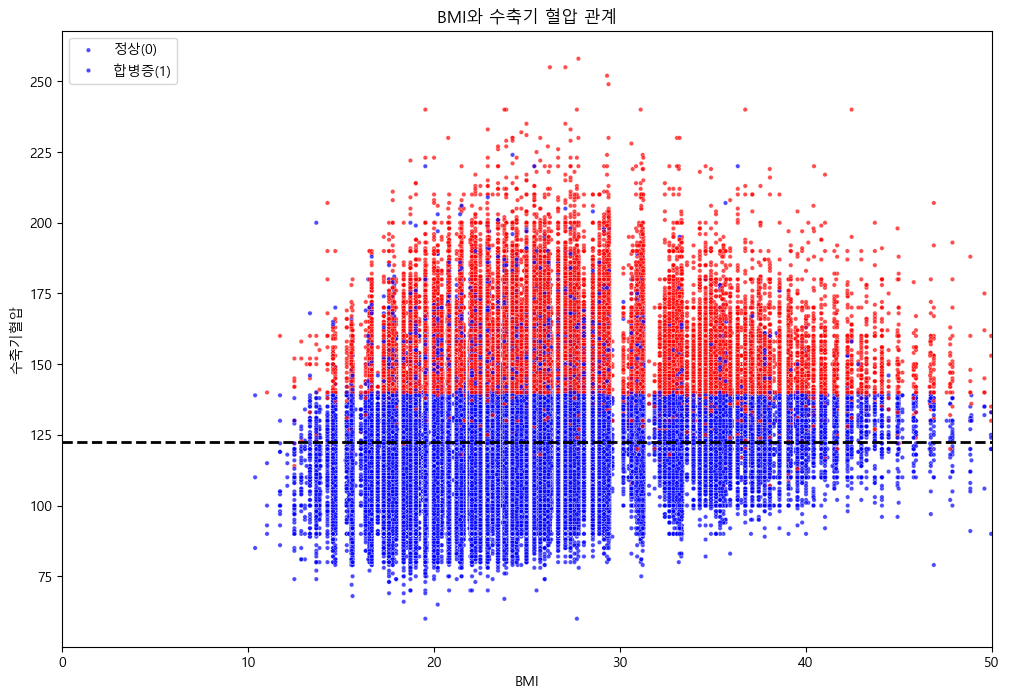

In [126]:
mean_bmi = df['BMI'].mean()
mean_sbp = df['수축기혈압'].mean()

plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df,
    x='BMI',
    y='수축기혈압',
    hue='합병증여부',
    palette=['blue','red'],
    alpha=0.7,
    s=10
)

plt.axhline(y=mean_sbp, color='black', linestyle='--', linewidth=2, label='수축기혈압 평균')
plt.xlim(0,50)

plt.xlabel('BMI')
plt.ylabel('수축기혈압')
plt.title('BMI와 수축기 혈압 관계')

plt.legend(labels=['정상(0)', '합병증(1)'],loc='upper left')
plt.show()

> - 전반적으로 BMI가 증가할수록 수축기혈압이 상승하는 경향
> - BMI 30 이상인 고도 비만군에서 합병증 동반 비율이 높아지는 패턴을 보임

## 3. 특성 데이터 전처리

- 주요 변수들을 특성 데이터로, 고혈압 여부 및 합병증 여부 데이터를 타겟 데이터로 설정 후 분류 문제를 해결
- 특성 변수들은 변수 간 범위 차이가 존재하므로 standard 스케일링 진행
- 타겟 데이터의 데이터 불균형이 존재하였으며 예측 시, 언더샘플링(과소표본화)기법을 적용하여 데이터 균형 조정

### 3.1 스케일링 전처리

3.1.1. 특성 데이터 통계표 확인

In [209]:
df.describe()

,성별,연령,체중,수축기혈압,이완기혈압,공복혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,흡연상태,혈색소,BMI,합병증여부
count,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00,3976624.00
mean,1.48,52.54,64.26,123.02,75.74,101.12,196.67,115.63,55.60,114.55,1.55,14.24,24.15,0.06
std,0.50,15.07,13.67,14.64,10.19,23.52,25.14,61.22,9.43,22.47,0.80,1.55,3.89,0.24
min,1.00,25.00,30.00,54.00,10.00,1.00,30.00,1.00,1.00,1.00,1.00,0.10,9.80,0.00
25%,1.00,40.00,55.00,113.00,69.00,89.00,196.00,107.00,55.00,114.00,1.00,13.20,21.48,0.00
50%,1.00,55.00,65.00,122.00,76.00,96.00,196.00,107.00,55.00,114.00,1.00,14.20,23.88,0.00
75%,2.00,65.00,75.00,132.00,82.00,106.00,196.00,107.00,55.00,114.00,2.00,15.40,26.16,0.00
max,2.00,90.00,135.00,269.00,202.00,961.00,2635.00,8012.00,922.00,2536.00,3.00,25.00,63.78,1.00


3.1.2. Standard 스케일링
- sklearn.preprocessing의 StandardScaler를 활용하여 수치형 특성 변수들의 범위 차이를 보정
- 고혈압 여부 및 합병증 여부와 같이 타겟에 해당하는 변수들은 스케일링에서 제외
- 수치형 특성 변수에 대해 평균 0, 표준편차 1로 변환하여 모델 학습 전 정규화 완료/

In [19]:
target = '고혈압여부'

y = df[target].values

df.drop(['고혈압여부','당뇨여부','고지혈증여부'],axis=1, inplace=True)

numeric = df.select_dtypes('number')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10396\2378293431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['고혈압여부','당뇨여부','고지혈증여부'],axis=1, inplace=True)


In [20]:
from sklearn.preprocessing import StandardScaler

x = df[numeric.columns]

scaler = StandardScaler()
scaler.fit(x)

trans_x = scaler.transform(x)
trans_x.shape

(3976624, 14)

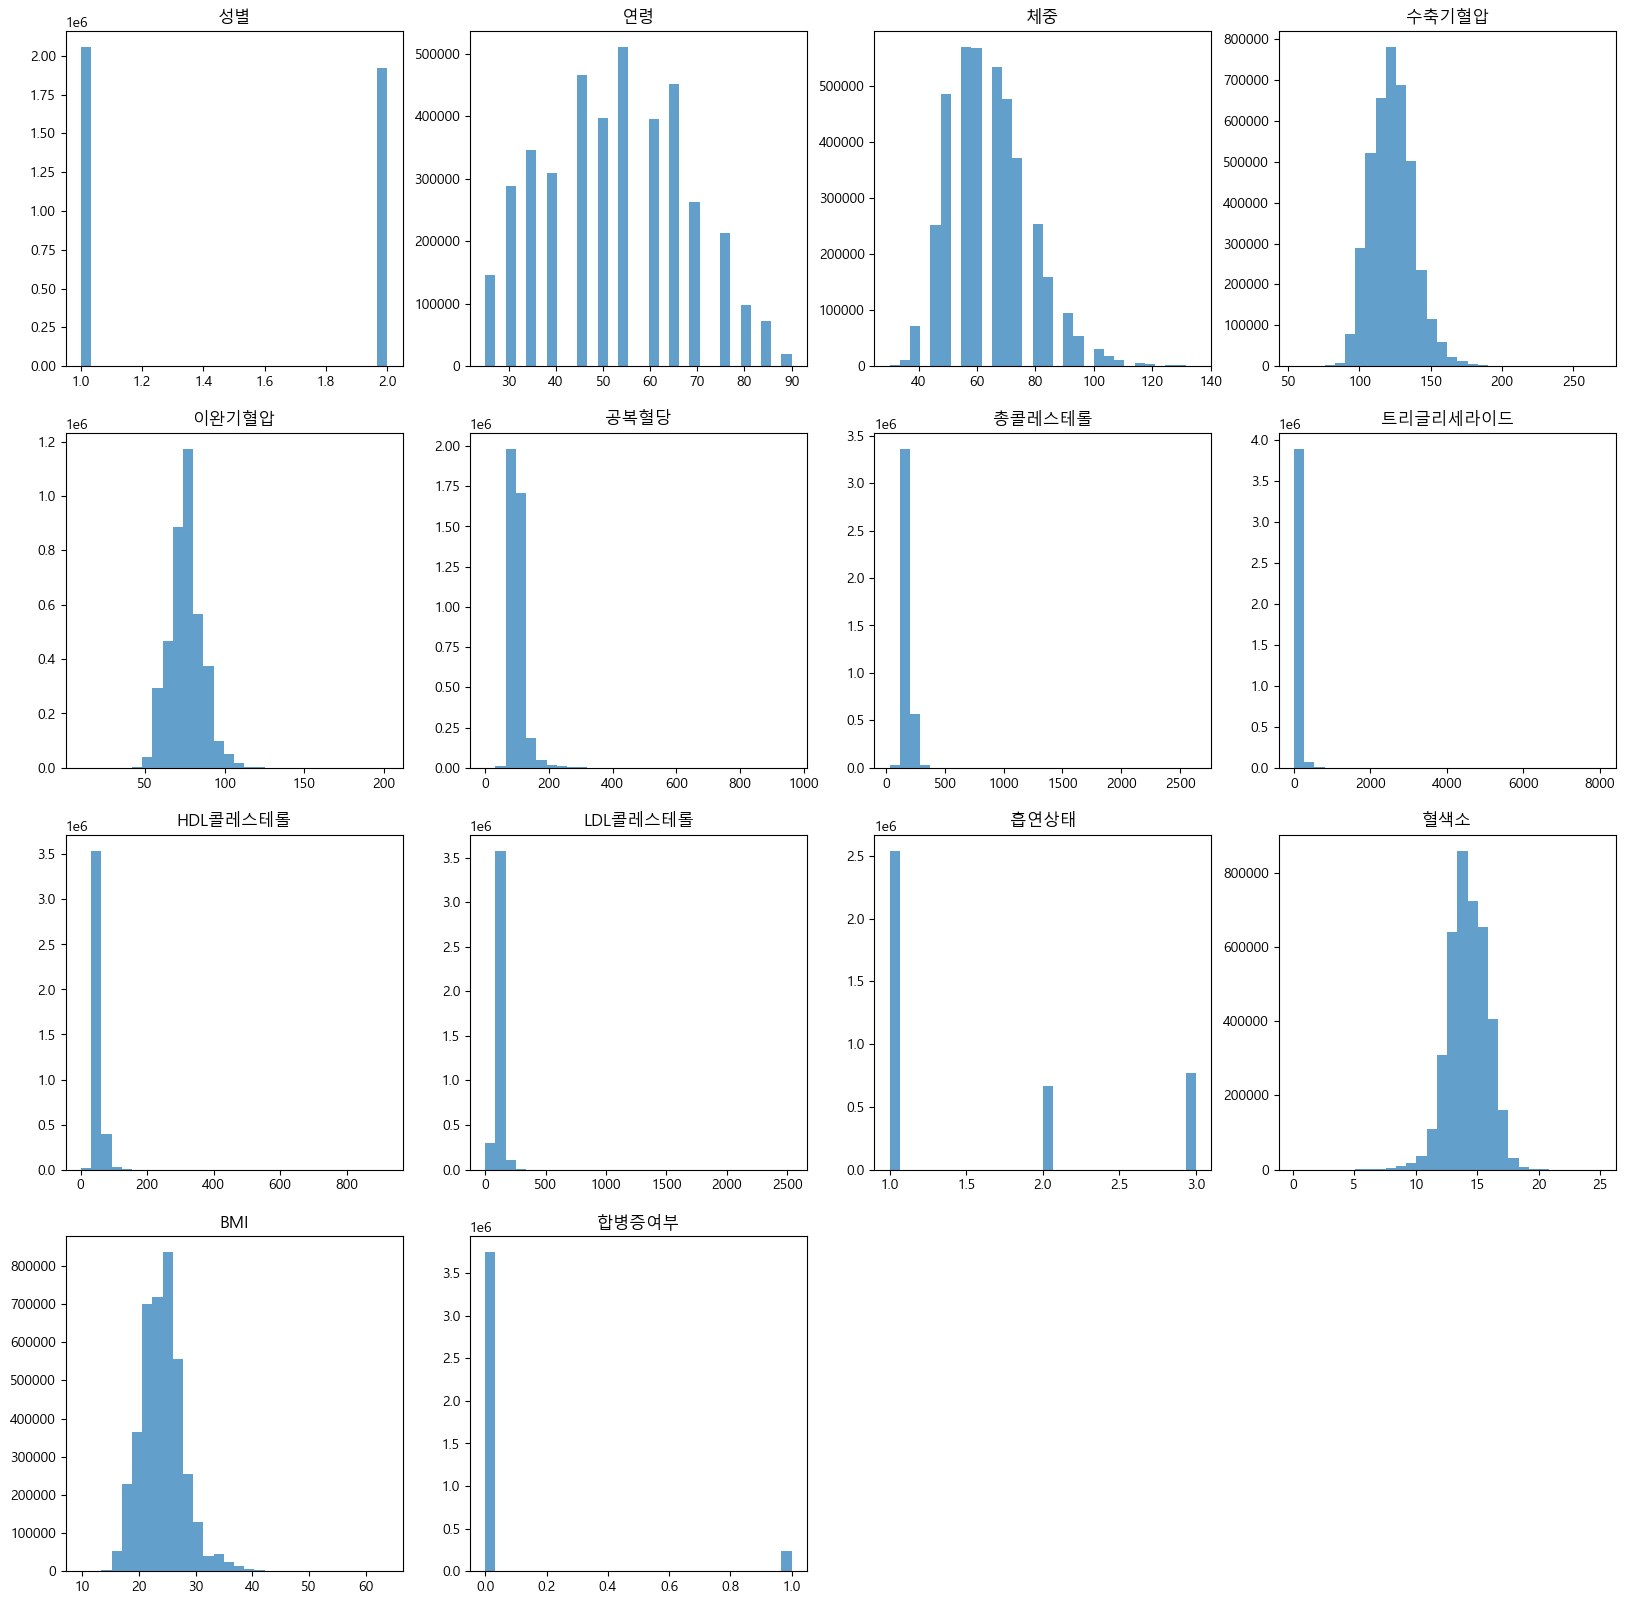

In [21]:
plt.figure(figsize=(20,20))

for i,c in enumerate(numeric.columns):
    ax = plt.subplot(4,4,i+1)
    ax.hist(numeric[c], bins=30, alpha = 0.7)
    ax.set_title(c)

plt.show()

In [22]:
y.shape

(3976624,)

In [23]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(trans_x,y, 
                                                    test_size = 0.2, 
                                                    random_state=42)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3181299, 14) (795325, 14) (3181299,) (795325,)


## 4. 모델 학습 및 예측
- 고혈압 및 합병증 여부를 예측하기 위한 분류 모델로 4가지 모델 사용하여 성능 비교

### 4.1 모델 비교

> - Logistic Regression
    - 기본적인 선형 모델로 해석이 용이하고 과적합에 강함\
    - random_state = 0 으로 결과의 재현성을 확보\

> - TREE
    - max_depth, min_samples_split 하이퍼파라미터를 조정하여 과적합 방지 시도 
    - 트리 깊이를 제한했음에도 불구하고 여전히 과적합 경향이 나타남

> - Random Forest Classifier
    -  앙상블 기법으로 다수의 결정트리 평균화하여 예측
>   - min_samples_leaf를 조정하여 복잡도 제한
>   - 여전히 테스트 데이터 성능 불안정

> - SVC
    - C=100, max_iter=100 으로 설정하여 수렴 조건 설정
>   - 연산 비용이 크고 느리지만 비교군으로 실험


In [24]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(random_state=0)
lreg.fit(train_x, train_y)
predict_lr = lreg.predict(test_x)

In [25]:
from sklearn import tree

#dtc = tree.DecisionTreeClassifier()
dtc = tree.DecisionTreeClassifier(max_depth=5, 
                       min_samples_split=10, 
                       random_state=0)

dtc.fit(train_x, train_y)

predict_dt = dtc.predict(test_x)

In [26]:
from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier(n_estimators=100, 
#                            class_weight = 'balanced', 
#                            random_state=0)

rfc = RandomForestClassifier(n_estimators=100, 
                             max_depth=6, 
                             min_samples_leaf=10, 
                             random_state=0)

rfc.fit(train_x,train_y)
predict_rf = rfc.predict(test_x)

In [27]:
from sklearn.svm import SVC

svc = SVC(C=100, max_iter=100)
svc.fit(train_x, train_y)

predict_sv = svc.predict(test_x)

C:\Users\tjdud\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y, predict_lr))
print(accuracy_score(test_y, predict_dt))
print(accuracy_score(test_y, predict_rf))
print(accuracy_score(test_y, predict_sv))

0.9731983780215635
1.0
1.0
0.871877534341307


In [29]:
from sklearn.metrics import f1_score

print(f1_score(test_y, predict_lr))
print(f1_score(test_y, predict_dt))
print(f1_score(test_y, predict_rf))
print(f1_score(test_y, predict_sv))

0.901087682827233
1.0
1.0
0.4106579989936554


4.1.1 혼동행렬
- FN은 1.85%로 비교적 낮음
- FP도 1% 이하로 낮은 편
- 전체적으로 예측 정확도가 높고 균형 있는 예측 성능을 보임 

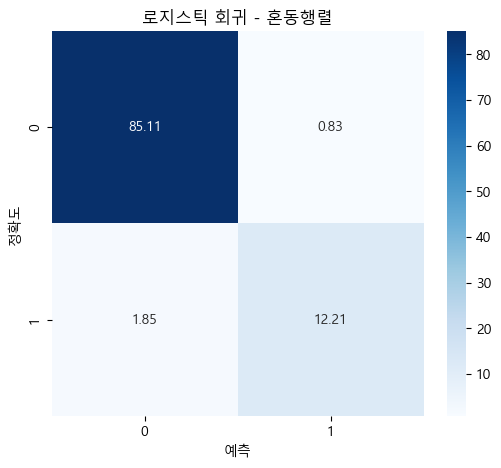

In [212]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_y, predict_lr)

cm_percent = cm / np.sum(cm) * 100

plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap = 'Blues')

plt.title('로지스틱 회귀 - 혼동행렬')
plt.xlabel('예측')
plt.ylabel('정확도')
plt.show()

### 4.2 합병증 머신러닝
- 합병증 여부 분포 확인하기
- 데이터 불균형이 심함 : 합병증(0)이 압도적으로 많음 & 합병증(1) 예측 어려움

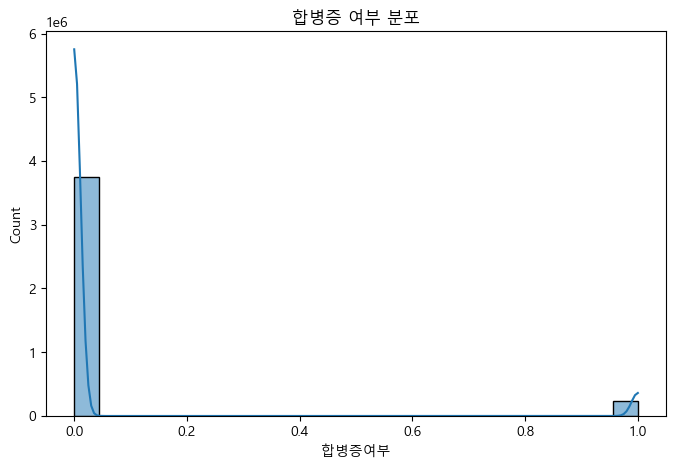

In [30]:
y = df['합병증여부']

plt.figure(figsize=(8,5))
sns.histplot(y, kde=True)
plt.title('합병증 여부 분포')
plt.show()

4.2.1 언더샘플링
- 합병증(0)을 언더샘플링 적용하여 1/5로 유지하도록 변경
    - 1/3 언더샘플링 시 과적합 발생
- 데이터 불균형을 완화하여 모델이 극단적인 예측에 치우치지 않도록 학습 데이터 구성

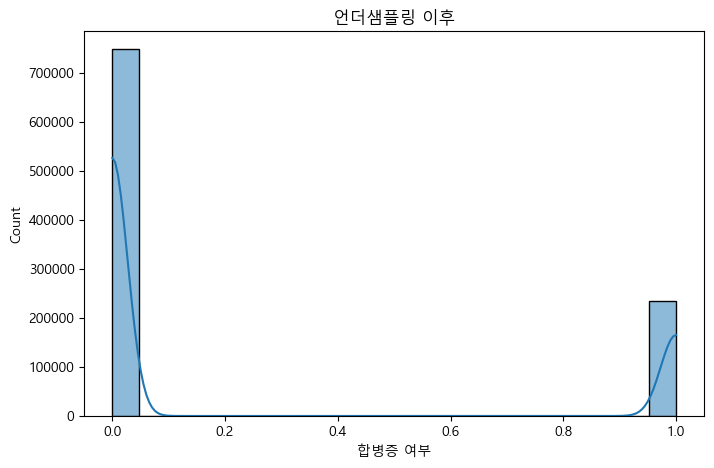

In [31]:
df_0 = df[df['합병증여부'] == 0]
df_1 = df[df['합병증여부'] == 1]

df_under = df_0.sample(frac=1/5, random_state=42)

df_bal = pd.concat([df_under, df_1])

df_bal = df_bal.sample(frac=1, random_state=42).reset_index(drop=True)

#print(df_bal['합병증여부'].value_counts(normalize=True))

y_bal = df_bal['합병증여부']

plt.figure(figsize=(8,5))
sns.histplot(y_bal, kde=True)

plt.title('언더샘플링 이후')
plt.xlabel('합병증 여부')
plt.ylabel('Count')
plt.show()

4.2.2. 모델 학습
- 3가지 분류 모델을 사용하여 '합병증 여부' 예측 수행
- 로지스틱 회귀, 결정트리, 랜덤포레스트
- 모든 모델은 동일한 전처리 및 분할 데이터 기반으로 학습

In [43]:
X = df_bal.drop(columns=['합병증여부'])
y = df_bal['합병증여부']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)
pred_dt = model_dt.predict(X_test)
pred_rf = model_rf.predict(X_test)

4.2.3. 성능 평가
>-  정확도, 정밀도, 재현율, f1_score를 기반으로 모델 성능 비교
>-  3모델 모두 같은 성능을 보임
>-  데이터 특성과 변수 중요도가 제한적이며, 데이터 불균형으로 학습할 데이터 부족

성능
- Accuracy : 0.89
- Precision : 0.80
- Recall : 0.74
- F1_score : 0.77

In [46]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def print_metrics(name, y_true, y_pred):
    print(f'{name}')
    print('Accuracy :', accuracy_score(y_true, y_pred))
    print('Precision :', precision_score(y_true, y_pred))
    print('Recall :', recall_score(y_true, y_pred))
    print('F1 Score :', f1_score(y_true, y_pred))
    print('')

print_metrics('로지스틱 회귀', y_test, pred_lr)
print_metrics('의사 결정 트리', y_test, pred_lr)
print_metrics('랜덤포레스트', y_test, pred_lr)

로지스틱 회귀
Accuracy : 0.8960787305462313
Precision : 0.806978350990327
Recall : 0.7440699921428723
F1 Score : 0.7742484338920131

의사 결정 트리
Accuracy : 0.8960787305462313
Precision : 0.806978350990327
Recall : 0.7440699921428723
F1 Score : 0.7742484338920131

랜덤포레스트
Accuracy : 0.8960787305462313
Precision : 0.806978350990327
Recall : 0.7440699921428723
F1 Score : 0.7742484338920131



4.2.4. 변수 중요도 분석
- 로지스틱 회귀 모델의 계수를 기반으로 합병증 여부 예측에 영향을 많이 준 변수들을 분석

> 수축기혈압 - 혈압의 직접적인 지표\
> LDL콜레스테롤 - 혈관질환 영향 높음\
> 총 콜레스테롤 - 전반적 지질 수치\
> 트리글리세라이드 - 중성지방 및 대사증후군 관련 높음

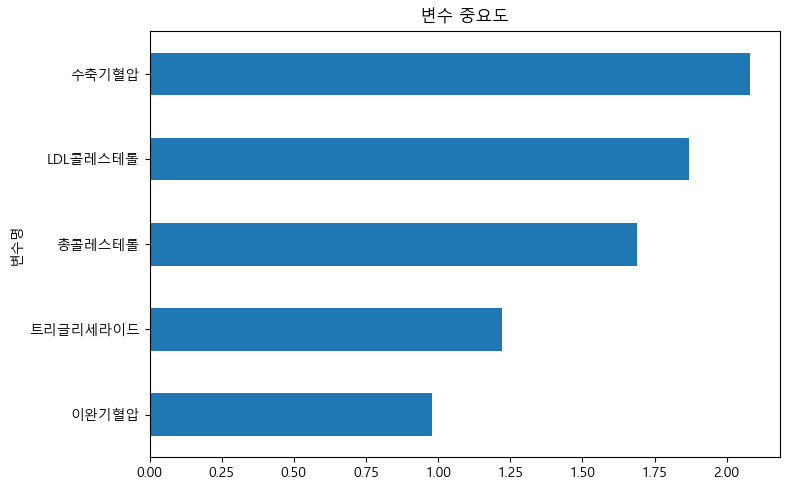

In [48]:
coef_series = pd.Series(model_lr.coef_[0], index=X.columns)
top5_lr = coef_series.abs().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
top5_lr.plot(kind='barh')
plt.gca().invert_yaxis() 

plt.title('변수 중요도')
plt.ylabel('변수명')
plt.tight_layout()
plt.show()